## 5.2 Scikit-Learn简介

### 5.2.1 Scikit-Learn 的数据表示
> 1.数据表：基本的数据表就是二维网格数据。其中的每一行表示数据集中的每个样本，而列表示构成每个样本的相关特征。


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> 如上表所示，每行数据表示每朵被观察的鸢尾花，行数表示数据集中记录的鸢尾花总数。<br>
一般情况下称这个矩阵的行为**样本(samples)**，行数记录为n_samples.<br>
每列数据表示每个样本某个特征的量化值，将矩阵的列称为**特征(features)**,列数记为n_features.

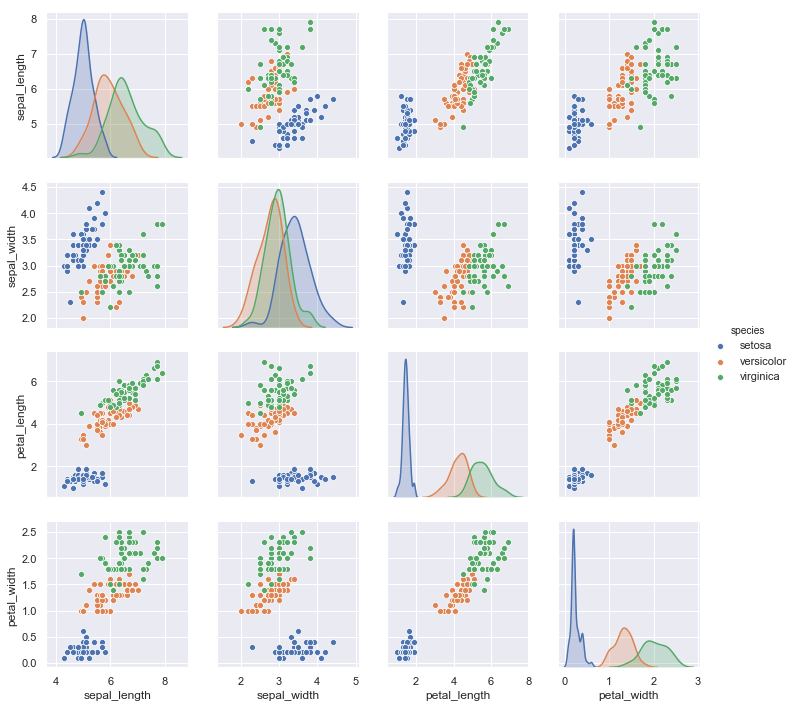

In [9]:
sns.pairplot(iris,hue='species')

### 5.2.2 Scikit-Learn 评估器API
> (1): 通过从Scikit-Learn中导入合适的评估器类，选择模型类.<br>
(2): 用合适的数值对模型类进行实例化，配置模型超参数(hyperparameter).<br>
(3): 整理数据，通过前面介绍的方法获取特征矩阵和目标数组.<br>
(4): 调整模型实例的fit()方法对数据进行拟合.<br>
(5): 对新数据应用模型：<br>
* 在有监督学习模型中，通常使用predict()方法预测新数据的标签.<br>
* 在无监督学习模型中，通常使用transform()或predict()方法转换或推断数据的性质.

#### 有监督学习示例：简单线性回归

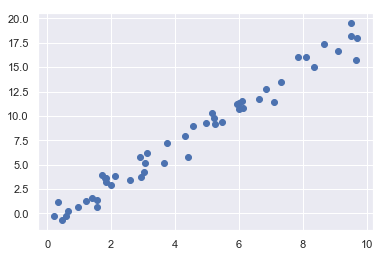

In [22]:
rng = np.random.RandomState(42)
X = 10*rng.rand(50)
y = 2*X-1+rng.randn(50)
plt.scatter(X,y)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model
#超参数：在模型拟合数据之前必须呗确定的参数

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
X = X[:,np.newaxis] #维度变换，(50,) --> (50,1)
#拟合
model.fit(X,y)
#获得模型参数
print('回归系数：',model.coef_)
print('截距：',model.intercept_)

回归系数： [1.9776566]
截距： -0.9033107255311164


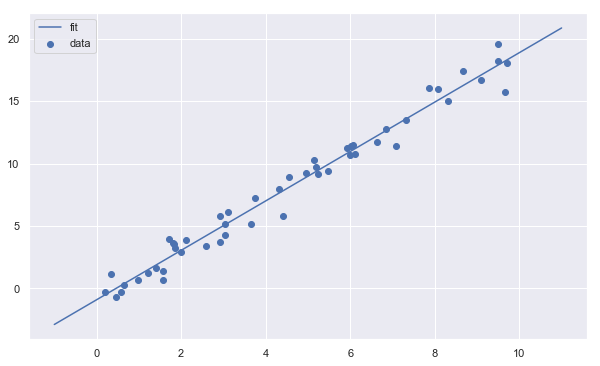

In [28]:
#预测
X_test = np.linspace(-1,11)
X_test = X_test[:,np.newaxis]
y_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(X,y,label='data')
plt.plot(X_test,y_pred,label='fit')
plt.legend(loc='best')

---
#### 有监督学习示例:鸢尾花数据分类
> 为鸢尾花数据集键建立模型，先用一部分数据进行训练，再用模型预测出其他样本的标签<br>
使用高斯朴素贝叶斯(Gaussian naive Bayes)，该方法假设每个特征中属于每一类的观测值都符合高斯分布。

In [36]:
#划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.iloc[:,:4],iris.species,test_size=0.3,random_state=1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(105, 4) (105,) (45, 4) (45,)


In [45]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('准确率：%.3f'%(accuracy_score(y_test,y_pred)))

准确率：0.933


In [44]:
print('准确率：%.3f'%(sum(y_test.values == y_pred)/len(y_pred)))

准确率：0.933


---
#### 无监督学习示例：鸢尾花数据降维
> 使用**主成分分析(PCA)**方法，返回两个主成分，即用二维数据表示鸢尾花的四维数据.

In [51]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
X_iris = iris.iloc[:,:4]
model.fit(X_iris)
X_2D = model.transform(X_iris)
print(X_iris.head())
X_2D[:5,:]

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

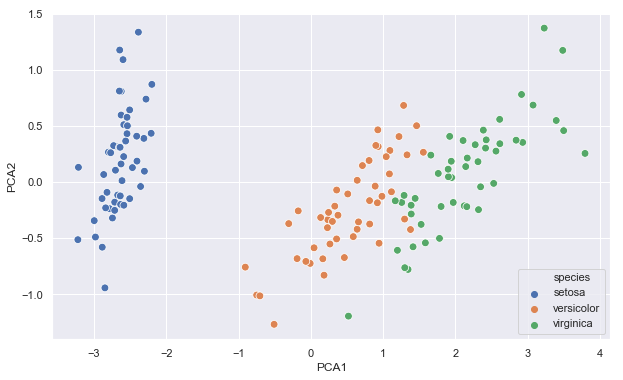

In [68]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
plt.figure(figsize=(10,6))
sns.scatterplot('PCA1','PCA2',hue='species',data=iris,s=60)

---
#### 无监督学习示例：鸢尾花数据聚类
> 使用**混合模型(GMM)**聚类，GMM模型试图将数据构造成若干服从高斯分布的概率度函数簇

In [62]:
from sklearn.mixture import BayesianGaussianMixture
model = BayesianGaussianMixture(n_components=3,covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

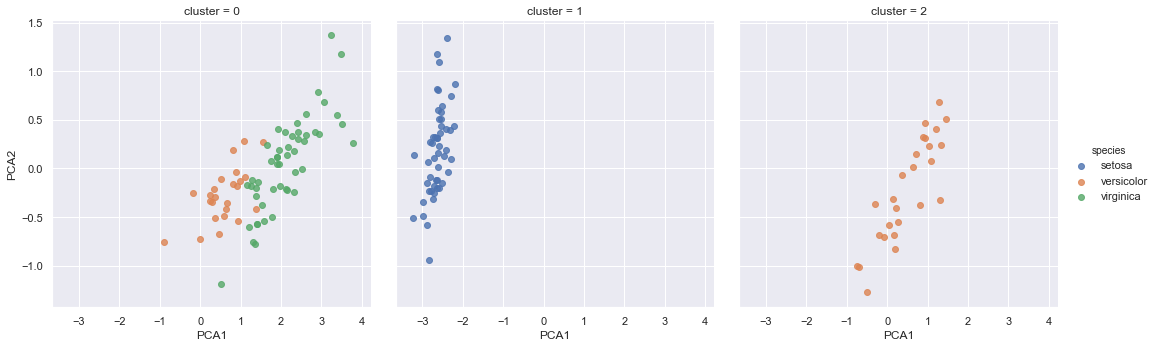

In [71]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2',data=iris,hue='species',col='cluster',fit_reg=False)

---
### 5.2.3 手写字体探索
#### 1.加载并可视化手写数字

In [74]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

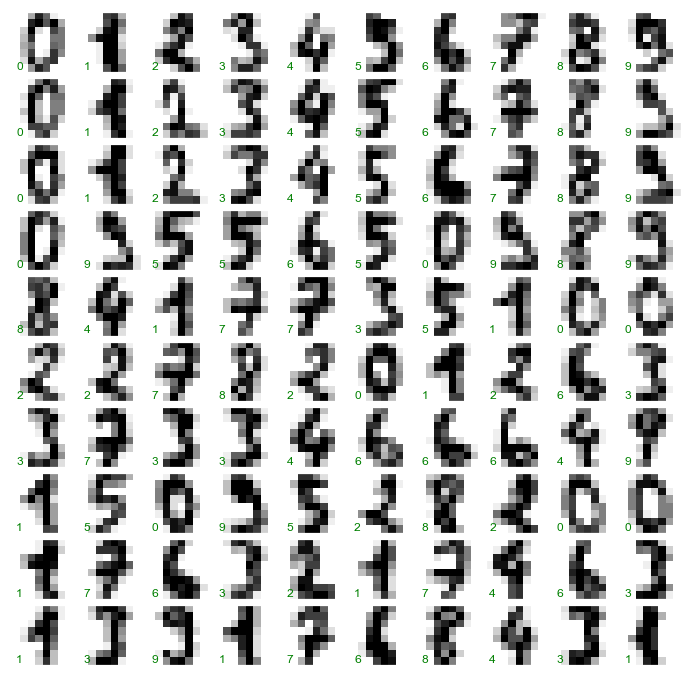

In [81]:
#对前一百张图进行可视化
fig,axes = plt.subplots(10,10,figsize=(12,12),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(digits.target[i]),transform=ax.transAxes,color='green')

In [82]:
X = digits.data
y = digits.target
print(X.shape,y.shape)

(1797, 64) (1797,)


#### 2.Isomap降维


In [84]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)#用流行学习中的Isomap算法将数据降到二维
iso.fit(X)
data_projected = iso.transform(X)
data_projected.shape

(1797, 2)

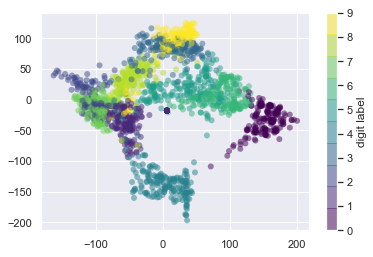

In [92]:
plt.scatter(data_projected[:,0],data_projected[:,1],c=y,
            edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('viridis',10))
plt.colorbar(label='digit label',ticks=range(10))


#### 数字分类

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
model = GaussianNB()
model.fit(X_train,y_train)
y_model = model.predict(X_test)
print('准确率%.3f'%(accuracy_score(y_model,y_test)))


准确率0.833


Text(54.260000000000005, 0.5, 'true value')

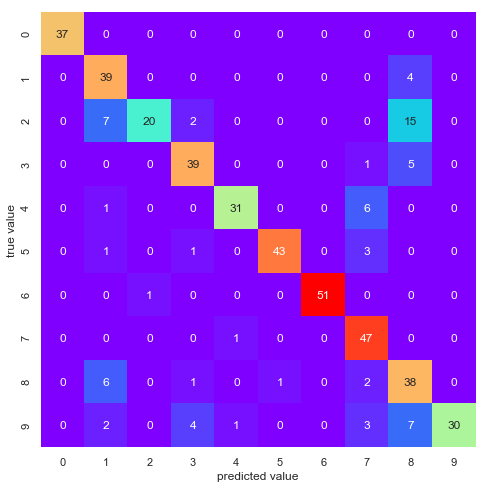

In [99]:
#可视化混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_model)
plt.figure(figsize=(8,8))
sns.heatmap(mat,square=True,annot=True,cbar=False,cmap='rainbow')
plt.xlabel('predicted value')
plt.ylabel('true value')

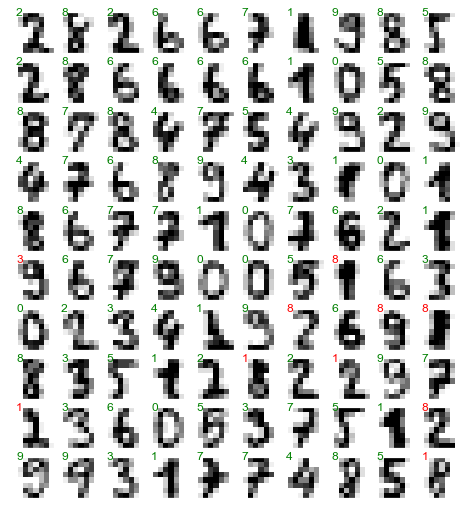

In [101]:
fig,axes = plt.subplots(10,10,figsize=(8,9),subplot_kw={'xticks':[],'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))
test_image = X_test.reshape(-1,8,8)
for i,ax in enumerate(axes.flat):
    ax.imshow(test_image[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_model[i]),color='green' if (y_test[i]==y_model[i]) else 'red')
    